# <center>Model performance</center>
---

Note: a total of 17 different models were trained on HPC clusters. Rather than include all the output files here, I copied the scores for each model directly from my terminal. All bash scripts, output files, etc., will be made available upon request.

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

First, let's compare the training and testing scores for all estimators used in each of the three models. We can use a plotting function to make it easier.

In [2]:
def plot_scores(scores, title):
    '''
    Makes a bar plot of scores on train and test sets.
    INPUTS:
        scores -- a dict with entries 'model name': {'train': XX, 'test': XX}
        title -- the title of the matplotlib figure
    OUTPUT:
        A bar plot (matplotlib figure).
    '''
    training_scores = [scores[model]['train'] for model in scores]
    testing_scores = [scores[model]['test'] for model in scores]
    barWidth = 0.40
    r1 = np.arange(len(scores))
    r2 = [x + barWidth for x in r1]
    plt.figure(figsize = (8, 4))
    plt.bar(r1, training_scores, color='#2C3E51', width=barWidth, edgecolor='white', label='Train')
    plt.bar(r2, testing_scores, color='#BF9001', width=barWidth, edgecolor='white', label='Test')
    plt.xticks([r + 0.5*barWidth for r in range(len(scores))], scores.keys())
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()

### Classifier 1

In [3]:
scores_c1 = {
    'Forest': {'train': 100, 'test': 89},
    'KNN': {'train': 100, 'test': 84},
    'MLP': {'train': 84, 'test': 83},
    'Ridge': {'train': 82, 'test': 82},
    'Logistic': {'train': 80, 'test': 80},
}

<IPython.core.display.Javascript object>


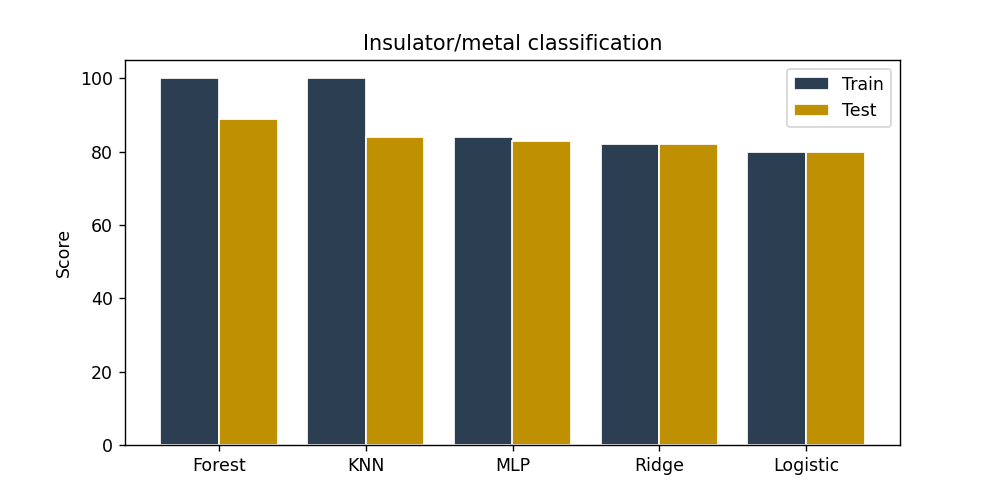

In [4]:
plot_scores(scores_c1, 'Insulator/metal classification')

Random forest is the winner for the first classifier.

### Regressor

In [5]:
scores_r = {  
    'Kernel': {'train': 100, 'test': 73},
    'Forest': {'train': 95, 'test': 69},
    'MLP': {'train': 58, 'test': 56},
    'KNN': {'train': 49, 'test': 30},
    'LASSO': {'train': 45, 'test': 42},
    'SVM': {'train': 33, 'test': 26}
}

<IPython.core.display.Javascript object>


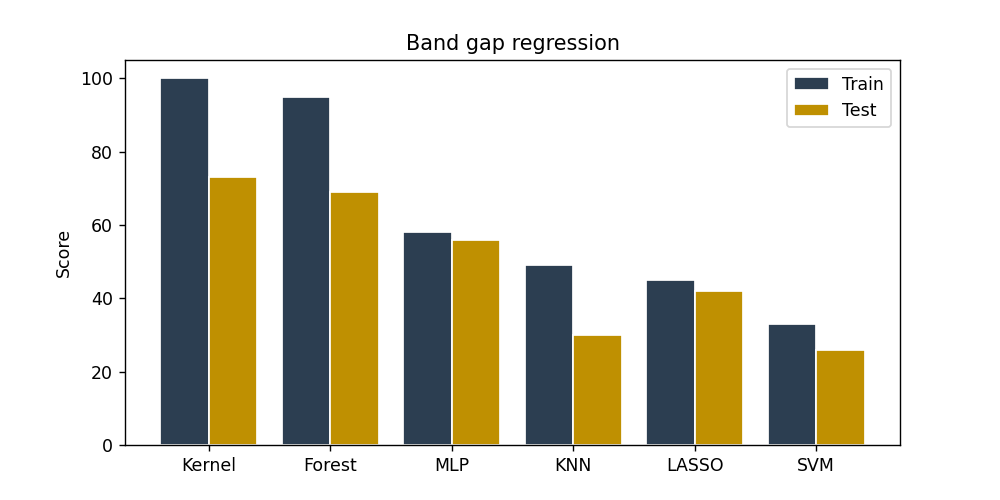

In [6]:
plot_scores(scores_r, 'Band gap regression')

Kernel ridge regression is the winner. Let's take a closer look at how the regressor performed. First, load in the trained model from the `pickle` jar.

In [ ]:
krr = pickle.load(open('./jar/regressor/KernelRidge_trained.p', 'rb'))

In [8]:
X_train = pd.read_csv('./data/X_train_r.csv')
y_train = pd.read_csv('./data/y_train_r.csv')
X_test = pd.read_csv('./data/X_test_r.csv')
y_test = pd.read_csv('./data/y_test_r.csv')

Next, calculate the predictions for train and test sets.

In [ ]:
pred_train = krr_model.predict(X_train)
pred_test = krr_model.predict(X_test)

Finally, plot the actual values vs. the predicted values.

#### Training performance

<IPython.core.display.Javascript object>


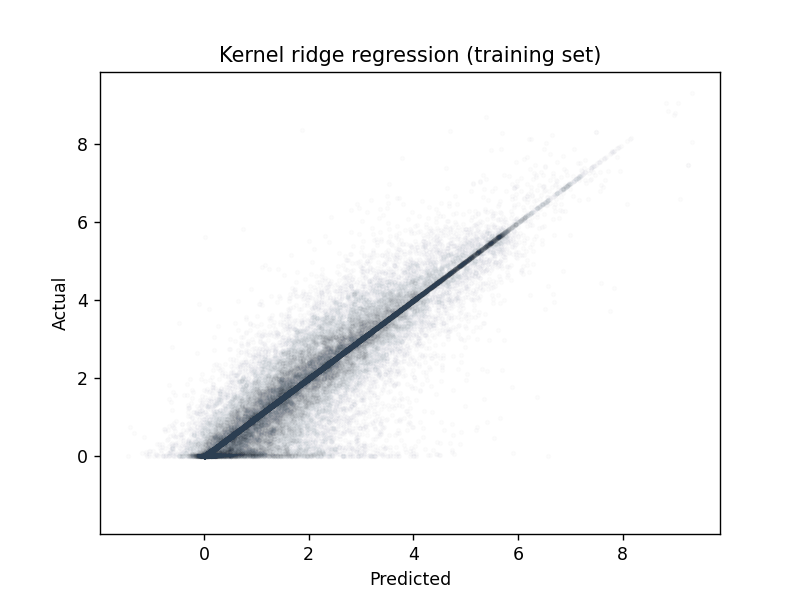

In [98]:
plt.figure()
plt.scatter(pred_train, y_train, s = 5, alpha = 5/510, color = '#2C3E51')
plt.xlabel('Predicted')
plt.ylabel('Actual')
left, right = plt.xlim()
plt.ylim(left, right)
plt.title('Kernel ridge regression (training set)');

#### Testing performance

<IPython.core.display.Javascript object>


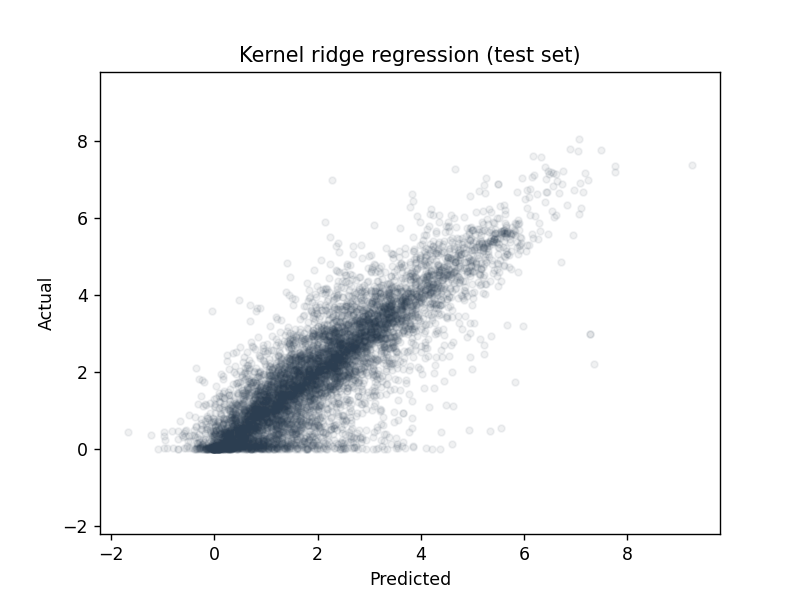

In [130]:
plt.figure()
plt.scatter(pred_test, y_test, s =15, alpha = 35/510, color = '#2C3E51')
plt.xlabel('Predicted')
plt.ylabel('Actual')
left, right = plt.xlim()
plt.ylim(left, right)
plt.title('Kernel ridge regression (test set)');

Let's see how reliable the model is by calculating errors.

In [112]:
print('RMSE: %0.3f eV' % np.sqrt(np.mean((pred_test - y_test)**2)))

RMSE: 0.814 eV


In [131]:
print('Mean absolute error: %0.3f eV' % np.mean(np.abs(pred_test - y_test)))

Mean absolute error: 0.565 eV


In [113]:
print('Average band gap: %0.3f eV' % np.mean(y_test))

Average band gap: 2.041 eV


### Classifier 2

In [10]:
scores_c2 = {
    'Forest': {'train': 99, 'test': 90},
    'SVM': {'train': 88, 'test': 85},
    'KNN': {'train': 100, 'test': 83},
    'MLP': {'train': 85, 'test': 84},
    'Ridge': {'train': 84, 'test': 83},
    'Logistic': {'train': 84, 'test': 82}
}

<IPython.core.display.Javascript object>


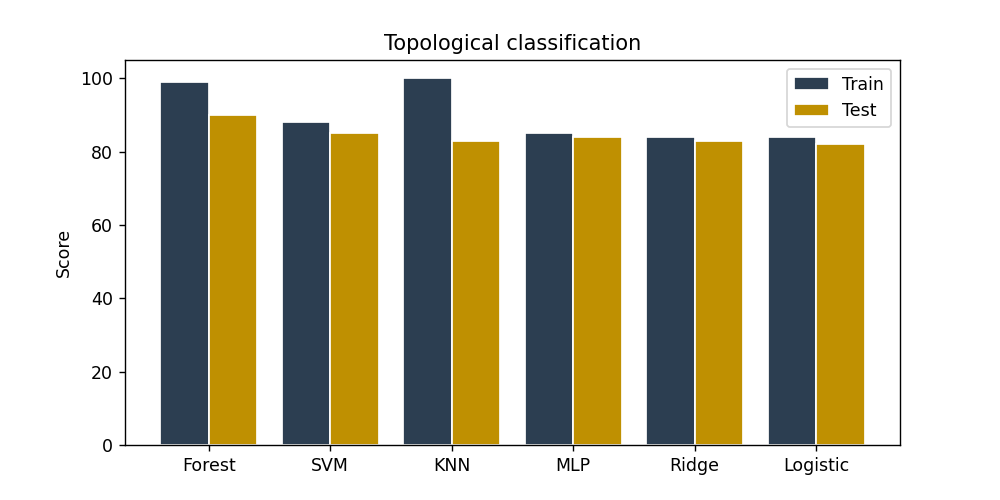

In [11]:
plot_scores(scores_c2, 'Topological classification')

Random forest wins again!